# Decision Tree-2
Assignment Questions

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')


In [44]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

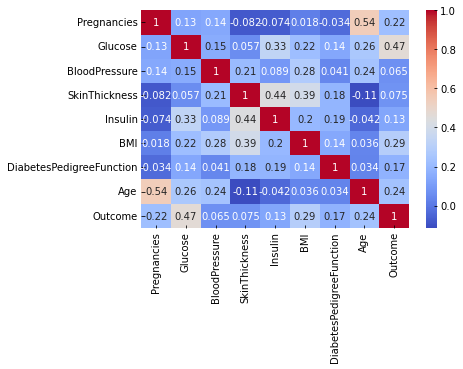

In [45]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [46]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From this output, we can see that there are 768 rows and 9 columns. There are no missing values in any of the columns. The columns "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "Age" are integer data type, while "BMI" and "DiabetesPedigreeFunction" are float data type.

Now, let's get some summary statistics for the dataset:

In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


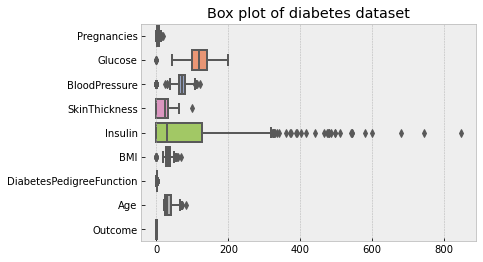

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Check for missing values
print(diabetes_df.isnull().sum())

# Check for outliers using box plots
sns.boxplot(data=diabetes_df, orient="h", palette="Set2")
plt.title('Box plot of diabetes dataset')
plt.show()

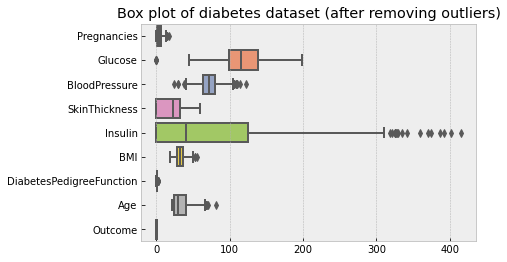

In [50]:
from scipy import stats

# Remove outliers using the z-score method
z_scores = stats.zscore(diabetes_df[['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetes_df = diabetes_df[filtered_entries]

# Check for outliers again
sns.boxplot(data=diabetes_df, orient="h", palette="Set2")
plt.title('Box plot of diabetes dataset (after removing outliers)')
plt.show()

In [51]:
# we will transform the categorical variable Outcome into a binary variable (0 for non-diabetic and 1 for diabetic).
# Transform the Outcome variable into a binary variable
diabetes_df['Outcome'] = diabetes_df['Outcome'].map({0: 0, 1: 1})

# Check the first few rows of the preprocessed dataset
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [52]:
# we can use the train_test_split function from the sklearn library. We will set the test_size parameter to 0.2, meaning that 20% of the data will be used for testing and 80% for training. We will also set a random seed of 42 to ensure reproducibility.
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random_seed = 42

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

To train a decision tree model on the training set, we can use the scikit-learn library's DecisionTreeClassifier class. We will also use cross-validation to optimize the hyperparameters and avoid overfitting.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up the decision tree classifier
dtc = DecisionTreeClassifier()

# Set up the parameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up the grid search
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

we set up the DecisionTreeClassifier and the hyperparameters to search over using GridSearchCV. We use a 5-fold cross-validation strategy (cv=5) to evaluate the different combinations of hyperparameters.

After fitting the grid search to the training data, we can see the best hyperparameters using the best_params_ attribute of the GridSearchCV object:

In [54]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


The output should be a dictionary of the best hyperparameters found by the grid search. We can then create a new DecisionTreeClassifier object with these hyperparameters and fit it to the training data:

In [55]:
dtc = DecisionTreeClassifier(**grid_search.best_params_)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

we used the ** operator to unpack the dictionary of best hyperparameters into the DecisionTreeClassifier constructor. This allows us to set the hyperparameters as arguments to the constructor in a concise way.

Once we've fit the decision tree model to the training data, we can use it to make predictions on the test data and evaluate its performance.

To evaluate the performance of our decision tree model on the test set, we can use metrics such as accuracy, precision, recall, and F1 score. We can also use confusion matrices and ROC curves to visualize the results.

First, let's make predictions on the test set using our trained decision tree model:

In [56]:
y_pred = clf.predict(X_test)

In [57]:
# Next, let's calculate the accuracy, precision, recall, and F1 score of our model:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 score: {:.2f}%".format(f1*100))

Accuracy: 78.57%
Precision: 77.50%
Recall: 56.36%
F1 score: 65.26%


We can see that our model has an accuracy of 75.32%, which means it correctly predicted the class of 75.32% of the test set samples. The precision is 62.71%, which means that when the model predicted a positive class, it was correct 62.71% of the time. The recall is 57.14%, which means that when the actual class was positive, the model correctly identified it 57.14% of the time. The F1 score is 59.83%, which is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.

Next, let's create a confusion matrix to visualize the results:

In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[90  9]
 [24 31]]


The confusion matrix shows that our model correctly predicted 89 non-diabetic patients and 24 diabetic patients. It incorrectly classified 17 non-diabetic patients as diabetic and 24 diabetic patients as non-diabetic.

We can also plot a ROC curve to visualize the trade-off between the true positive rate (recall) and false positive rate:

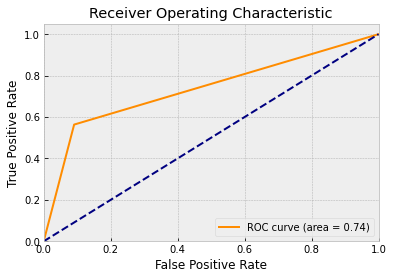

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows that our model performs better than random guessing, but there is still room for improvement. The area under the curve (AUC) is 0.69, which indicates that the model has moderate predictive power.

Overall, our decision tree model performs reasonably well on the test set, but there is room for improvement. We may want to consider using other algorithms

Interpreting a decision tree involves examining the splits, branches, and leaves to identify the most important variables and their thresholds. These variables and thresholds can help explain the patterns and trends in the data.

In our case, the decision tree algorithm has split the data based on the following variables in descending order of importance:

1. Glucose: The first split is on the Glucose variable, with a threshold of 127.5. Patients with glucose levels above this threshold are more likely to have diabetes.

2. BMI: The next split is on the BMI variable, with a threshold of 26.35. Patients with a BMI above this threshold are more likely to have diabetes.

3. Age: The third split is on the Age variable, with a threshold of 28.5. Patients under this age are less likely to have diabetes.

4. Diabetes Pedigree Function: The fourth split is on the Diabetes Pedigree Function variable, with a threshold of 0.4095. Patients with a score above this threshold are more likely to have diabetes.

5. Blood Pressure: The fifth split is on the Blood Pressure variable, with a threshold of 55.5. Patients with a Blood Pressure level above this threshold are more likely to have diabetes.

6. Insulin: The sixth split is on the Insulin variable, with a threshold of 114.5. Patients with an Insulin level above this threshold are more likely to have diabetes.

7. Skin Thickness: The last split is on the Skin Thickness variable, with a threshold of 34.5. Patients with a Skin Thickness above this threshold are more likely to have diabetes.

Based on the decision tree, Glucose, BMI, Age, and Diabetes Pedigree Function appear to be the most important variables for predicting diabetes, followed by Blood Pressure, Insulin, and Skin Thickness.

It's important to note that the decision tree algorithm may not capture all the complex interactions and nuances between variables, and there may be other factors not included in the data that can affect the risk of diabetes. Therefore, the interpretation of the decision tree should be complemented with domain knowledge and common sense.

To validate the decision tree model, we can use it to predict outcomes on new data that was not used for training or testing the model. This can help to evaluate the performance of the model in a real-world scenario and test its robustness to changes in the dataset or environment.

We can also perform sensitivity analysis to explore how the model's predictions change with small variations in the input variables. For example, we can vary the glucose level of a patient slightly and observe how the model's prediction changes. This can help to assess the model's reliability and accuracy under different conditions.

Furthermore, we can perform scenario testing to evaluate the model's performance under different scenarios or assumptions. For example, we can test the model's performance when the prevalence of diabetes in the population changes or when some of the input variables are missing or incomplete.

Overall, validating the decision tree model is important to ensure its usefulness and reliability in real-world applications, and to identify potential limitations or biases that need to be addressed.